In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv("data\df_01.csv", index_col=[0])

In [3]:
y = df[['FORCE_2020_LITHOFACIES_LITHOLOGY']]
X = df.drop(columns=['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [4]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA'],
      dtype='object')

In [5]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [6]:
y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

C:\Users\tatya\AppData\Local\Temp\ipykernel_18160\1504116783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)


In [7]:
y = y['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [8]:
# encoder = OneHotEncoder(sparse_output=False)

# one_hot_encoded = encoder.fit_transform(y)

# y = pd.DataFrame(one_hot_encoded,
#                           columns=encoder.get_feature_names_out())


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
model = RandomForestClassifier()
parametrs = {'max_depth': range(5, 31, 5), 'n_estimators': range(10, 101, 10)}
grid_search_cv_clf = GridSearchCV(model, parametrs, cv=5,  verbose=10)
grid_search_cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START max_depth=5, n_estimators=10...............................
[CV 1/5; 1/60] END max_depth=5, n_estimators=10;, score=0.802 total time=   6.1s
[CV 2/5; 1/60] START max_depth=5, n_estimators=10...............................
[CV 2/5; 1/60] END max_depth=5, n_estimators=10;, score=0.814 total time=   6.2s
[CV 3/5; 1/60] START max_depth=5, n_estimators=10...............................
[CV 3/5; 1/60] END max_depth=5, n_estimators=10;, score=0.799 total time=   6.3s
[CV 4/5; 1/60] START max_depth=5, n_estimators=10...............................
[CV 4/5; 1/60] END max_depth=5, n_estimators=10;, score=0.812 total time=   6.7s
[CV 5/5; 1/60] START max_depth=5, n_estimators=10...............................
[CV 5/5; 1/60] END max_depth=5, n_estimators=10;, score=0.803 total time=   6.3s
[CV 1/5; 2/60] START max_depth=5, n_estimators=20...............................
[CV 1/5; 2/60] END max_depth=5, n_estimators=20

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 31, 5),
                         'n_estimators': range(10, 101, 10)},
             verbose=10)

In [13]:
grid_search_cv_clf.best_params_

{'max_depth': 30, 'n_estimators': 80}

In [14]:
clf = grid_search_cv_clf.best_estimator_

In [ ]:
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
prediction = clf.predict(X_test)

In [16]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

      Anhydrite       0.99      0.94      0.97       176
          Chalk       0.98      1.00      0.99       699
           Coal       0.95      0.80      0.87        45
       Dolomite       0.92      0.64      0.75        69
         Halite       1.00      1.00      1.00      1633
      Limestone       0.95      0.88      0.91      2173
           Marl       0.93      0.93      0.93      1315
      Sandstone       0.95      0.95      0.95      3732
Sandstone/Shale       0.92      0.90      0.91      2597
          Shale       0.97      0.99      0.98     17347
           Tuff       0.96      0.97      0.97       570

       accuracy                           0.96     30356
      macro avg       0.96      0.91      0.93     30356
   weighted avg       0.96      0.96      0.96     30356



<Axes: >

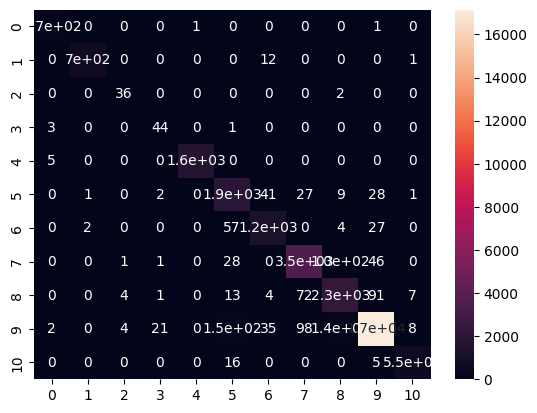

In [17]:
cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True)

In [18]:
from funcs import feature_importance_plotter

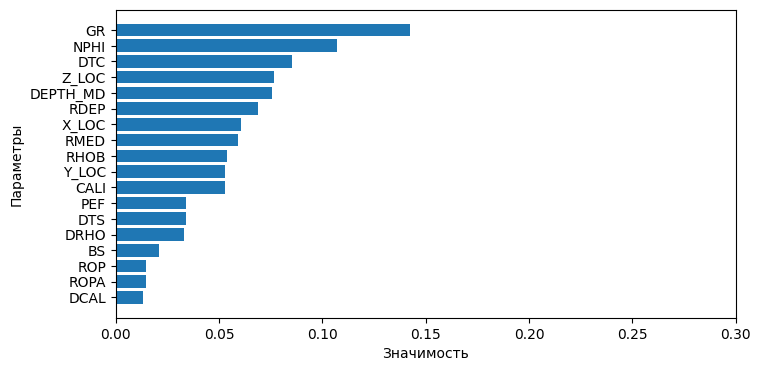

In [19]:
feature_importance_plotter(model=clf, feature_names=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA'])